# Proyek Analisis Data: Air-quality-dataset
- **Nama:** Risna Dwi Indriani
- **Email:** risnadwiindriani02@gmail.com
- **ID Dicoding:** risna_dwi_indriani__QgRY

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas udara di kota wanliu berdasarkan SO2 pada kota wanliu dari tahun ke tahun?
- Bagaimana tren udara di kota wanliu berdasarkan PM2.5 setiap bulannya?

## Import Semua Packages/Library yang Digunakan

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mengimpor semua library yang akan digunakan pada proses analisis data air quality pada kota wanliu

## Data Wrangling

### Gathering Data

In [4]:
# load data yang akan digunakan untuk tahapan analisis data
wanliu_df = pd.read_csv("/content/wanliu.csv")

In [40]:
# menampilkan 3 baris pertama pada dataset
wanliu_df.head(3)

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2013-03-01 01:00:00,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,2013-03-01 02:00:00,3,2013,3,1,2,3.0,6.0,17.3,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu


In [55]:
# Membuat kolom datetime
years = wanliu_df['year'].values
months = wanliu_df['month'].values
days = wanliu_df['day'].values
hours = wanliu_df['hour'].values
full_date = []

for i in range(wanliu_df.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
wanliu_df = pd.concat([dates,wanliu_df],axis=1)

wanliu_df.head()

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2013-03-01 01:00:00,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,2013-03-01 02:00:00,3,2013,3,1,2,3.0,6.0,17.3,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,2013-03-01 03:00:00,4,2013,3,1,3,11.0,30.0,8.0,14.0,1262.9,56.3,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,13.0,9.0,59.3,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


**Insight:**
- Pada projek analisis ini saya menggunakan dataset kota wanliu untuk menganalisis pengaruh polutan pada kota tersebut.
- Terdapat 17 kolom yang masing-masing dari kolom tersebut memuat informasi seperti waktu pengambilan data, zat yang mencemari kota winliu, cuaca, dan juga kolom pencarian nama kota.

### Assessing Data

In [56]:
# melihat tipe data
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     35064 non-null  datetime64[ns]
 1   No       35064 non-null  int64         
 2   year     35064 non-null  int64         
 3   month    35064 non-null  int32         
 4   day      35064 non-null  int64         
 5   hour     35064 non-null  int64         
 6   PM2.5    35064 non-null  float64       
 7   PM10     35064 non-null  float64       
 8   SO2      35064 non-null  float64       
 9   NO2      35064 non-null  float64       
 10  CO       35064 non-null  float64       
 11  O3       35064 non-null  float64       
 12  TEMP     35064 non-null  float64       
 13  PRES     35064 non-null  float64       
 14  DEWP     35064 non-null  float64       
 15  RAIN     35064 non-null  float64       
 16  wd       35064 non-null  object        
 17  WSPM     35064 non-null  float6

In [57]:
# Periksa Missing value
wanliu_df.isna().sum()

,0
date,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0


In [58]:
# periksa duplikasi
wanliu_df.duplicated().sum()

0

In [59]:
# Rangkuman statistik
wanliu_df.describe(include="all")

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Wanliu
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6826,NaN,35064
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.367365,110.460854,18.358828,65.076953,1316.436168,49.319866,13.428906,1011.097936,3.266493,0.068258,NaN,1.501295,NaN
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,NaN,0.000000,NaN
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,40.000000,4.000000,37.000000,600.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,NaN,0.800000,NaN
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,89.000000,10.852800,59.300000,1000.000000,37.000000,14.300000,1010.800000,4.000000,0.000000,NaN,1.200000,NaN
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,152.000000,22.276800,87.000000,1500.000000,70.000000,22.900000,1019.400000,15.800000,0.000000,NaN,2.000000,NaN
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,NaN,11.200000,NaN


**Insight:**
- Terdapat ketidaksesuaian tipe data pada kolom wd dan juga kolom stasiun.
- pada kolom wd tipe data yang seharusnya adalah objek dan pada kolom stasiun tipe data yang seharusnya adalah kategori.
- Data tersebut tidak mengandung missing value dan tidak ada data yang terduplikat.

### Cleaning Data

In [69]:
# Mengisi kolom yang kosong
wanliu_df.fillna({'PM2.5':82.7, 'PM10':110.0, 'SO2': 17.3, 'NO2': 59.3, 'CO': 1262.9, 'O3': 56.3, 'TEMP': 13.5, 'PRES': 1011.8, 'DEWP': 3.1, 'RAIN': 0.06, 'WSPM': 1.7, 'wd': "NE"}, inplace=True)

In [70]:
# Periksa nilai yang hilang
print(wanliu_df.isnull().sum())

date       0
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


In [62]:
# Melihat 3 baris pertama
print(wanliu_df.head(3))

                 date  No  year  month  day  hour  PM2.5  PM10   SO2   NO2  \
0 2013-03-01 00:00:00   1  2013      3    1     0    8.0   8.0   6.0  28.0   
1 2013-03-01 01:00:00   2  2013      3    1     1    9.0   9.0   6.0  28.0   
2 2013-03-01 02:00:00   3  2013      3    1     2    3.0   6.0  17.3  19.0   

      CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0  400.0  52.0  -0.7  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  400.0  50.0  -1.1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  400.0  55.0  -1.1  1023.5 -18.2   0.0  NNW   5.6  Wanliu  


In [67]:
# menyimpan data yang sudah bersih
wanliu_df.to_csv('all.csv', index=False)

**Insight:**
- dilakukan mengisian untuk nilai untuk kolom yang kosong ini berguna agar data tetap konsisten
- setelah diperiksa kembali dataset tersebut sudah tidak mengandung nilai yang kosong.

## Exploratory Data Analysis (EDA)

### Explore ...

In [23]:
# mengelompokkan data berdasarkan tahun
wanliu_df.groupby("year").mean(numeric_only=True)

,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3672.5,7.500000,15.803922,11.5,91.570221,112.281522,23.641182,68.463437,1260.816108,49.824904,15.497740,1008.200408,6.465400,0.071582,1.532761
2014,11724.5,6.526027,15.720548,11.5,89.403253,130.074989,24.805993,74.927078,1364.336564,43.712865,13.878402,1011.311313,4.166895,0.056575,1.475160
2015,20484.5,6.526027,15.720548,11.5,80.574589,106.775571,14.856632,58.423356,1330.681575,52.256130,13.355756,1011.258459,3.045445,0.072468,1.485879
2016,29256.5,6.513661,15.756831,11.5,71.553973,92.981785,10.698053,58.431148,1232.917771,53.706728,13.404928,1011.312552,2.525364,0.083381,1.465745
2017,34356.5,1.474576,15.288136,11.5,94.043503,110.904661,20.266102,68.964548,1738.542161,36.009463,0.519515,1022.481344,-12.929732,0.003432,1.815678


In [42]:
# mengelompokkan data berdasarkan bulan
wanliu_df.groupby("month").mean(numeric_only=True)

,No,year,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,,,,,,,,,,,
1,20862.500000,2015.500000,16.000000,11.5,97.707728,120.742272,35.240155,75.568145,2235.617708,26.608669,-1.529643,1022.619002,-14.220665,0.000376,1.778125
2,21612.287611,2015.504425,14.628319,11.5,89.910951,106.770280,32.430162,71.965376,1555.973378,32.264528,1.186302,1020.552667,-12.448046,0.009204,1.822308
3,13518.500000,2014.500000,16.000000,11.5,96.994993,146.535551,32.095015,86.589796,1436.901949,37.648344,8.451957,1014.186391,-6.898589,0.007056,1.890188
4,14250.500000,2014.500000,15.500000,11.5,74.067257,123.555556,16.311765,67.380581,857.888576,57.124741,15.240694,1008.577014,1.373264,0.021806,1.928021
5,14982.500000,2014.500000,16.000000,11.5,67.129435,107.255746,14.768918,57.489919,834.239247,81.666064,21.104066,1002.663239,8.117608,0.049933,1.740423
6,15714.500000,2014.500000,15.500000,11.5,74.381667,89.947812,10.357944,52.550092,1102.812882,84.009181,24.312986,999.556806,16.284861,0.136632,1.289931
7,16446.500000,2014.500000,16.000000,11.5,75.628024,90.383737,7.316926,47.858199,842.425941,84.728862,26.916331,998.335215,20.539449,0.285383,1.224798
8,17190.500000,2014.500000,16.000000,11.5,56.448387,78.377554,7.801305,48.108960,788.497749,75.953269,26.369892,1001.459677,19.532728,0.112870,1.173690
9,17922.500000,2014.500000,15.500000,11.5,64.490590,83.180625,8.076663,56.566938,892.896528,44.905802,20.594353,1009.011493,14.510590,0.128826,1.114201


**Insight:**
- dilakukan pengelompokkan data untuk memperoleh informasi mengenai kualitas udara di kota winliu
- beberapa faktor seperti zat yang mencemari kota winliu mempengaruhi kualitas udara di kota winliu.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kualitas udara di kota wanliu berdasarkan SO2 dari tahun ke tahun?

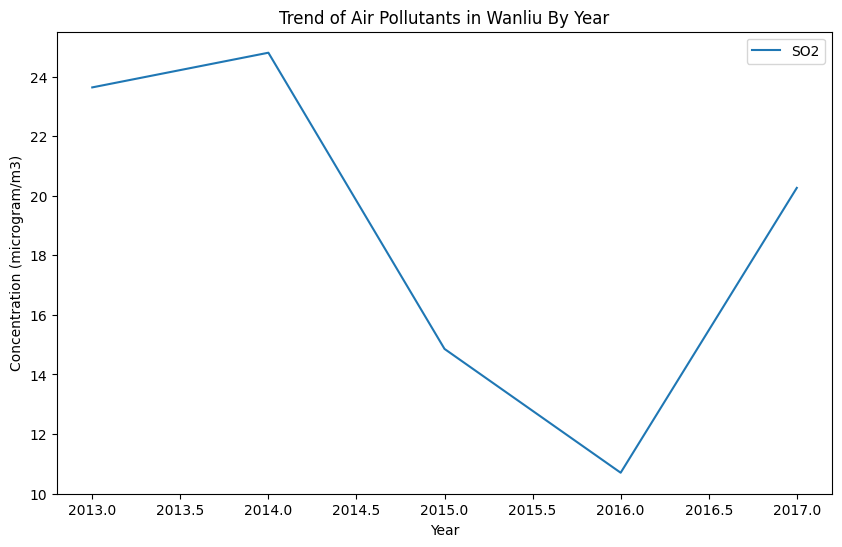

In [35]:
by_year = wanliu_df.groupby("year").mean(numeric_only=True)
plt.figure(figsize=(10,6))
plt.plot(by_year.index, by_year["SO2"], label="SO2")
plt.xlabel("Year")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Kualitas Udara Pada Kota Wanliu")
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana tren udara di kota wanliu berdasarkan O3 setiap bulannya?

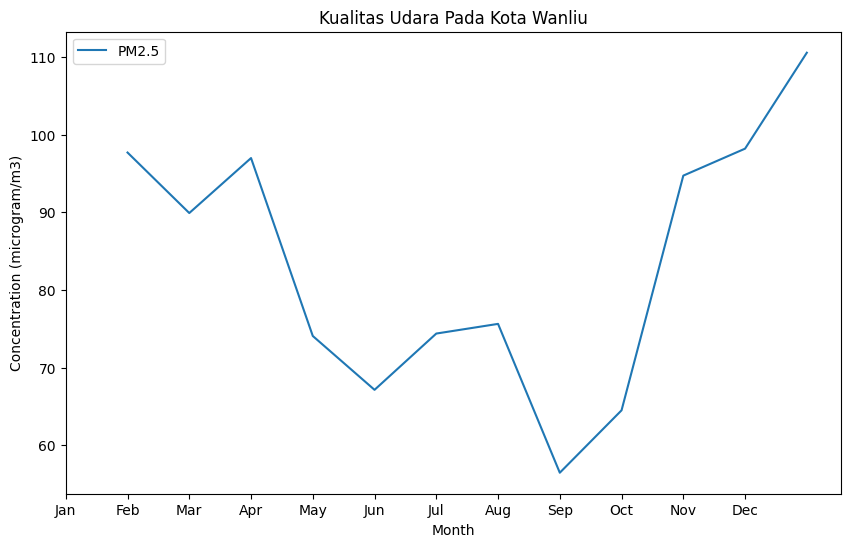

In [72]:
ByMonth = wanliu_df.groupby("month").mean(numeric_only=True)

plt.figure(figsize=(10,6))
plt.plot(ByMonth.index, ByMonth["PM2.5"], label="PM2.5")
plt.xlabel("Month")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Kualitas Udara Pada Kota Wanliu")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.show()

**Insight:**
- Berdasarkan SO2 trjadi peningkatan dari tahun ke tahun
- Berdasarkan PM2.5 terjadi penurunan disetiap bulannya

## Conclusion

- Conclution pertanyaan 1 : Kualitas udara di kota Winliu berdasarkan SO2 terus mengalami peningkatan pada tahun 2014 kemudian kualitas udara tersebut mengalami penurunan ditahun 2016, dan mengalami kenaikan lagi di tahun 2016 sampai dengan 2017.
- Conclution pertanyaan 2 : kualitas udara di kota winliu berdasarkan PM2.5 terus mengalami kenaikan dan penurunan yang cukup signifikan setiap bulannya. penurunan terjadi dipertengahan tahun yaitu pada bulan april dan juga september, lalu terjadi peningkatan yang cukup signifikan pada bulan oktober sampai dengan desember.